In [4]:
## IMPORTS

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import Image
import math
#from scipypy.stats import kendalltau
import timeit
import warnings

warnings.filterwarnings('ignore')


In [12]:
## Read Kills

kills = pd.read_csv('data/kills.csv')

## erstelle Id 
kills['id'] = kills['Address'].astype(str).str[-16:]

kills.head()

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos,id
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,fbb300951ad8327c
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,13908,5960,fbb300951ad8327c
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,8281,7889,fbb300951ad8327c
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.880,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,8522,8895,fbb300951ad8327c
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,8902,7643,fbb300951ad8327c


In [11]:
### read matchinfo

matchinfo = pd.read_csv('data/matchinfo.csv')

## erstelle ID:

matchinfo['id'] = matchinfo['Address'].astype(str).str[-16:] ## letzten 20 Zeichen anzeigen

matchinfo.head()


,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,...,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address,id
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,Dyrus,...,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh,http://matchhistory.na.leagueoflegends.com/en/...,fbb300951ad8327c
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,Cris,...,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie,http://matchhistory.na.leagueoflegends.com/en/...,055b17da8456fdc8
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,Flaresz,...,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna,http://matchhistory.na.leagueoflegends.com/en/...,8e8a9b58df366e2d
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,Rhux,...,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna,http://matchhistory.na.leagueoflegends.com/en/...,0ed1cd0e0e57329c
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,Benny,...,Porpoise8,RekSai,Slooshi8,Lulu,Maplestreet8,Corki,Dodo8,Annie,http://matchhistory.na.leagueoflegends.com/en/...,f932becf86175f38


In [14]:
### read Monster

monsters = pd.read_csv('data/monsters.csv')
monsters['id'] = monsters['Address'].astype(str).str[-16:]
monsters.head()

,Address,Team,Time,Type,id
0,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,37.267,DRAGON,fbb300951ad8327c
1,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,32.545,DRAGON,055b17da8456fdc8
2,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,26.177,DRAGON,055b17da8456fdc8
3,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,19.119,DRAGON,055b17da8456fdc8
4,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,24.577,DRAGON,8e8a9b58df366e2d


In [16]:
structures = pd.read_csv('data/structures.csv')
structures['id'] = structures['Address'].astype(str).str[-16:]
structures.head()

,Address,Team,Time,Lane,Type,id
0,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,27.542,MID_LANE,BASE_TURRET,fbb300951ad8327c
1,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,39.269,MID_LANE,NEXUS_TURRET,fbb300951ad8327c
2,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,33.583,BOT_LANE,INNER_TURRET,fbb300951ad8327c
3,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,23.038,TOP_LANE,INNER_TURRET,fbb300951ad8327c
4,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,16.556,BOT_LANE,OUTER_TURRET,fbb300951ad8327c


In [18]:
##### Monster typen was ham wa denn?
list_of_monster_type = monsters['Type'].unique()

array(['DRAGON', 'EARTH_DRAGON', 'WATER_DRAGON', 'AIR_DRAGON',
       'FIRE_DRAGON', 'ELDER_DRAGON', 'BARON_NASHOR', 'RIFT_HERALD'],
      dtype=object)

In [21]:
## Nur ein Drache & mit mehreren DrachenTypen)

old_ids_one_drake = monsters[ monsters['Type'] == 'DRAGON']['id'].unique()

old_ids_one_drake


array(['fbb300951ad8327c', '055b17da8456fdc8', '8e8a9b58df366e2d', ...,
       'd2eaf13bcbb3c021', '035394afd3bfc218', '94537494cdbc8b4c'],
      dtype=object)

In [22]:
print(monsters[monsters['Type']=='DRAGON'])
monsters = monsters[ ~monsters['id'].isin(old_ids_one_drake)]
print(monsters[monsters['Type']=='DRAGON'])

                                                 Address      Team    Time  \
0      http://matchhistory.na.leagueoflegends.com/en/...  bDragons  37.267   
1      http://matchhistory.na.leagueoflegends.com/en/...  bDragons  32.545   
2      http://matchhistory.na.leagueoflegends.com/en/...  bDragons  26.177   
3      http://matchhistory.na.leagueoflegends.com/en/...  bDragons  19.119   
4      http://matchhistory.na.leagueoflegends.com/en/...  bDragons  24.577   
...                                                  ...       ...     ...   
36561  http://matchhistory.na.leagueoflegends.com/en/...  rDragons   5.549   
36562  http://matchhistory.na.leagueoflegends.com/en/...  rDragons  13.128   
36563  http://matchhistory.na.leagueoflegends.com/en/...  rDragons  20.677   
36564  http://matchhistory.na.leagueoflegends.com/en/...  rDragons  24.478   
36565  http://matchhistory.na.leagueoflegends.com/en/...  rDragons  17.635   

         Type                id  
0      DRAGON  fbb300951ad832

In [23]:
## lösche alte spiele von anderen tabellen:

kills = kills[~kills['id'].isin(old_ids_one_drake)]
structures = structures[~structures['id'].isin(old_ids_one_drake)]
matchinfo = matchinfo[~matchinfo['id'].isin(old_ids_one_drake)]



In [30]:
### Zeit in Minuten zusammenpacken . Stackbares 

kills = kills[kills['Time']>0]
kills['Minute'] = kills['Time'].astype(int)
kills['Team'] = np.where( kills['Team']=='bKills','Blue','Red')

kills.head()

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos,id,Minute
4462,http://matchhistory.na.leagueoflegends.com/en/...,Red,6.032,CLG Huhi,TSM Svenskeren,TSM Bjergsen,NaN,NaN,NaN,7825,8666,55109b5a7a91ae87,6
4463,http://matchhistory.na.leagueoflegends.com/en/...,Red,9.428,CLG Huhi,TSM Biofrost,TSM Bjergsen,TSM Doublelift,NaN,NaN,8728,8751,55109b5a7a91ae87,9
4464,http://matchhistory.na.leagueoflegends.com/en/...,Red,9.780,CLG Xmithie,TSM Bjergsen,TSM Hauntzer,TSM Svenskeren,NaN,NaN,8655,1172,55109b5a7a91ae87,9
4465,http://matchhistory.na.leagueoflegends.com/en/...,Red,10.252,CLG Stixxay,TSM Doublelift,TSM Biofrost,NaN,NaN,NaN,3621,11607,55109b5a7a91ae87,10
4466,http://matchhistory.na.leagueoflegends.com/en/...,Red,12.993,CLG Darshan,TSM Doublelift,TSM Biofrost,NaN,NaN,NaN,5674,12903,55109b5a7a91ae87,12


In [33]:
f = {'Time':['mean','count']}

kills_grouped = kills.groupby(['id','Team','Minute']).agg(f).reset_index()
kills_grouped.columns = ['id','Team','Minute','Avg Time', 'Count'] #neue namen auf den spalten
kills_grouped = kills_grouped.sort_values(by=['id','Minute'])
kills_grouped.head(15)


,id,Team,Minute,Avg Time,Count
0,0001f4374a03c133,Red,4,4.635000,1
1,0001f4374a03c133,Red,6,6.064000,1
2,0001f4374a03c133,Red,8,8.194000,1
3,0001f4374a03c133,Red,10,10.478000,1
4,0001f4374a03c133,Red,17,17.387000,2
5,0001f4374a03c133,Red,18,18.077333,3
6,0001f4374a03c133,Red,21,21.790000,1
7,0001f4374a03c133,Red,22,22.473429,7
8,0001f4374a03c133,Red,31,31.241667,3
9,0001f4374a03c133,Red,32,32.763400,5


In [39]:
## Structures nochmal das gleiche

structures = structures[structures['Time'] > 0 ] # nix mit negativen oder nullzeiten
structures['Minute'] = structures['Time'].astype(int)


structures['Team'] = np.where(structures['Team']=='bTowers','Blue', 
                             np.where(structures['Team']=='bInhibs','Blue','Red'))

structures2 = structures.sort_values(by=['id','Minute'])
structures2


,Address,Team,Time,Lane,Type,id,Minute
6740,http://matchhistory.na.leagueoflegends.com/en/...,Red,11.182,TOP_LANE,OUTER_TURRET,0001f4374a03c133,11
57600,http://matchhistory.na.leagueoflegends.com/en/...,Red,11.006,BOT_LANE,OUTER_TURRET,0001f4374a03c133,11
6741,http://matchhistory.na.leagueoflegends.com/en/...,Red,16.556,BOT_LANE,OUTER_TURRET,0001f4374a03c133,16
57601,http://matchhistory.na.leagueoflegends.com/en/...,Red,16.145,TOP_LANE,OUTER_TURRET,0001f4374a03c133,16
57598,http://matchhistory.na.leagueoflegends.com/en/...,Red,18.378,MID_LANE,OUTER_TURRET,0001f4374a03c133,18
...,...,...,...,...,...,...,...
20213,http://matchhistory.na.leagueoflegends.com/en/...,Red,43.747,MID_LANE,NEXUS_TURRET,fff9913c8be5e3fd,43
20214,http://matchhistory.na.leagueoflegends.com/en/...,Red,43.813,MID_LANE,NEXUS_TURRET,fff9913c8be5e3fd,43
20218,http://matchhistory.na.leagueoflegends.com/en/...,Red,43.096,BOT_LANE,BASE_TURRET,fff9913c8be5e3fd,43
102221,http://matchhistory.na.leagueoflegends.com/en/...,Red,43.540,MID_LANE,INHIBITOR,fff9913c8be5e3fd,43


In [40]:
##packen wirs zusammen
kills_and_structures = kills_grouped.merge(structures2[['id','Minute','Team','Time','Lane','Type']], on=['id','Minute','Team'],how='outer')
kills_and_structures.head(20)

,id,Team,Minute,Avg Time,Count,Time,Lane,Type
0,0001f4374a03c133,Red,4,4.635000,1.0,NaN,NaN,NaN
1,0001f4374a03c133,Red,6,6.064000,1.0,NaN,NaN,NaN
2,0001f4374a03c133,Red,8,8.194000,1.0,NaN,NaN,NaN
3,0001f4374a03c133,Red,10,10.478000,1.0,NaN,NaN,NaN
4,0001f4374a03c133,Red,17,17.387000,2.0,NaN,NaN,NaN
5,0001f4374a03c133,Red,18,18.077333,3.0,18.378,MID_LANE,OUTER_TURRET
6,0001f4374a03c133,Red,21,21.790000,1.0,NaN,NaN,NaN
7,0001f4374a03c133,Red,22,22.473429,7.0,NaN,NaN,NaN
8,0001f4374a03c133,Red,31,31.241667,3.0,NaN,NaN,NaN
9,0001f4374a03c133,Red,32,32.763400,5.0,NaN,NaN,NaN


In [50]:
monsters['Monster_Type'] = np.where(monsters['Type'] == 'AIR_DRAGON', 'DRAGON',
                           np.where(monsters['Type'] == 'EARTH_DRAGON', 'DRAGON',
                           np.where(monsters['Type'] == 'FIRE_DRAGON', 'DRAGON',
                           np.where(monsters['Type'] == 'WATER_DRAGON', 'DRAGON',
                                    monsters['Type']))))
monsters = monsters[monsters['Time']>0]
monsters['Minute'] = monsters['Time'].astype(int)

#monsters['Team'].unique()
monsters['Team'] = np.where(monsters['Team']=='bDragons','Blue',
                    np.where(monsters['Team']=='bBarons','Blue',
                    np.where(monsters['Team']=='bHeralds','Blue',
                            'Red')))

monsters

                             

,Address,Team,Time,Type,id,Type2,Minute,Monster_Type
696,http://matchhistory.na.leagueoflegends.com/en/...,Red,23.444,EARTH_DRAGON,55109b5a7a91ae87,DRAGON,23,DRAGON
697,http://matchhistory.na.leagueoflegends.com/en/...,Red,31.069,WATER_DRAGON,55109b5a7a91ae87,DRAGON,31,DRAGON
698,http://matchhistory.na.leagueoflegends.com/en/...,Red,16.419,AIR_DRAGON,55109b5a7a91ae87,DRAGON,16,DRAGON
699,http://matchhistory.na.leagueoflegends.com/en/...,Red,32.022,EARTH_DRAGON,e147296c928da5b4,DRAGON,32,DRAGON
700,http://matchhistory.na.leagueoflegends.com/en/...,Red,25.304,WATER_DRAGON,e147296c928da5b4,DRAGON,25,DRAGON
...,...,...,...,...,...,...,...,...
44243,https://matchhistory.na.leagueoflegends.com/en...,Red,17.307,RIFT_HERALD,5723cd4ec98b86cc,RIFT_HERALD,17,RIFT_HERALD
44244,https://matchhistory.na.leagueoflegends.com/en...,Red,14.191,RIFT_HERALD,3b7875aa5a1869c4,RIFT_HERALD,14,RIFT_HERALD
44245,https://matchhistory.br.leagueoflegends.com/pt...,Red,16.258,RIFT_HERALD,413578e47941293a,RIFT_HERALD,16,RIFT_HERALD
44246,https://matchhistory.euw.leagueoflegends.com/e...,Red,17.243,RIFT_HERALD,22cad427dfd10959,RIFT_HERALD,17,RIFT_HERALD


In [53]:
### Packe alle zusammen

kills_structures_monsters = kills_and_structures.merge(monsters[['id','Minute','Team','Time','Type2']], on=['id','Minute'],how='outer')
kills_structures_monsters = kills_structures_monsters.sort_values(by=['id','Minute'])
kills_structures_monsters


,id,Team_x,Minute,Avg Time,Count,Time_x,Lane,Type,Team_y,Time_y,Type2
0,0001f4374a03c133,Red,4,4.635000,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0001f4374a03c133,Red,6,6.064000,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0001f4374a03c133,Red,8,8.194000,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0001f4374a03c133,Red,10,10.478000,1.0,NaN,NaN,NaN,NaN,NaN,NaN
76704,0001f4374a03c133,Red,11,NaN,NaN,11.182,TOP_LANE,OUTER_TURRET,Red,11.261,DRAGON
...,...,...,...,...,...,...,...,...,...,...,...
76699,fff9913c8be5e3fd,Red,43,43.938667,3.0,43.813,MID_LANE,NEXUS_TURRET,NaN,NaN,NaN
76700,fff9913c8be5e3fd,Red,43,43.938667,3.0,43.096,BOT_LANE,BASE_TURRET,NaN,NaN,NaN
76701,fff9913c8be5e3fd,Red,43,43.938667,3.0,43.540,MID_LANE,INHIBITOR,NaN,NaN,NaN
76702,fff9913c8be5e3fd,Red,43,43.938667,3.0,43.339,BOT_LANE,INHIBITOR,NaN,NaN,NaN


In [65]:
# id , Event_id , Team , Minute , Exakte Zeit, KillCount bis dahin, Structtype , StructLane, Monster

#kills_grouped

event_data = kills_grouped.append(structures2)

event_data = event_data.append(monsters[['id','Address','Team','Minute','Time','Type2']])

event_data['Time2'] = event_data['Time'].fillna(event_data['Avg Time'])

event_data = event_data.sort_values(by=['id','Time2'])

event_data['Event_Num'] = event_data.groupby('id').cumcount()+1

event_data = event_data[['id','Event_Num','Team','Minute','Time2','Count','Type','Lane','Type2']]

event_data.columns = ['id', 'EventNum','Team','Minute','Time','KillCount','StructType','StructLane','Monster']

event_data

,id,EventNum,Team,Minute,Time,KillCount,StructType,StructLane,Monster
0,0001f4374a03c133,1,Red,4,4.635000,1.0,NaN,NaN,NaN
1,0001f4374a03c133,2,Red,6,6.064000,1.0,NaN,NaN,NaN
2,0001f4374a03c133,3,Red,8,8.194000,1.0,NaN,NaN,NaN
3,0001f4374a03c133,4,Red,10,10.478000,1.0,NaN,NaN,NaN
57600,0001f4374a03c133,5,Red,11,11.006000,NaN,OUTER_TURRET,BOT_LANE,NaN
...,...,...,...,...,...,...,...,...,...
102221,fff9913c8be5e3fd,31,Red,43,43.540000,NaN,INHIBITOR,MID_LANE,NaN
20213,fff9913c8be5e3fd,32,Red,43,43.747000,NaN,NEXUS_TURRET,MID_LANE,NaN
20214,fff9913c8be5e3fd,33,Red,43,43.813000,NaN,NEXUS_TURRET,MID_LANE,NaN
58399,fff9913c8be5e3fd,34,Red,43,43.938667,3.0,NaN,NaN,NaN


In [69]:
#event spalte

event_data['Event'] = np.where(event_data['KillCount'] > 0, "KILLS", None)

event_data['Event'] = event_data['Event'].fillna(event_data['StructType'])
event_data['Event'] = event_data['Event'].fillna(event_data['Monster'])




,id,EventNum,Team,Minute,Time,KillCount,StructType,StructLane,Monster,Event
0,0001f4374a03c133,1,Red,4,4.635000,1.0,NaN,NaN,NaN,KILLS
1,0001f4374a03c133,2,Red,6,6.064000,1.0,NaN,NaN,NaN,KILLS
2,0001f4374a03c133,3,Red,8,8.194000,1.0,NaN,NaN,NaN,KILLS
3,0001f4374a03c133,4,Red,10,10.478000,1.0,NaN,NaN,NaN,KILLS
57600,0001f4374a03c133,5,Red,11,11.006000,NaN,OUTER_TURRET,BOT_LANE,NaN,OUTER_TURRET
...,...,...,...,...,...,...,...,...,...,...
102221,fff9913c8be5e3fd,31,Red,43,43.540000,NaN,INHIBITOR,MID_LANE,NaN,INHIBITOR
20213,fff9913c8be5e3fd,32,Red,43,43.747000,NaN,NEXUS_TURRET,MID_LANE,NaN,NEXUS_TURRET
20214,fff9913c8be5e3fd,33,Red,43,43.813000,NaN,NEXUS_TURRET,MID_LANE,NaN,NEXUS_TURRET
58399,fff9913c8be5e3fd,34,Red,43,43.938667,3.0,NaN,NaN,NaN,KILLS


In [70]:
event_data['Event'].unique()

array(['KILLS', 'OUTER_TURRET', 'DRAGON', 'RIFT_HERALD', 'BARON_NASHOR',
       'INNER_TURRET', 'BASE_TURRET', 'INHIBITOR', 'NEXUS_TURRET',
       'ELDER_DRAGON'], dtype=object)

In [73]:
NumEventAnalyse = event_data[['id','EventNum']].groupby('id').max().reset_index()

NumEventAnalyse2 = NumEventAnalyse.groupby('EventNum').count().reset_index()

NumEventAnalyse2


,EventNum,id
0,14,1
1,15,1
2,16,3
3,17,9
4,18,9
5,19,21
6,20,29
7,21,47
8,22,69
9,23,111


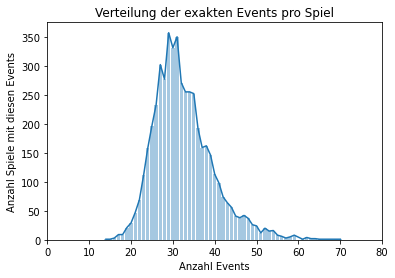

In [80]:
### Verteilung, Wieviele Events Pro SpieL graph

plt.bar(NumEventAnalyse2['EventNum'],NumEventAnalyse2['id'], alpha=0.4)
plt.plot(NumEventAnalyse2['EventNum'],NumEventAnalyse2['id'])
plt.title('Verteilung der exakten Events pro Spiel')
plt.xlim(0,80)
plt.xlabel('Anzahl Events')
plt.ylabel('Anzahl Spiele mit diesen Events')
plt.show()


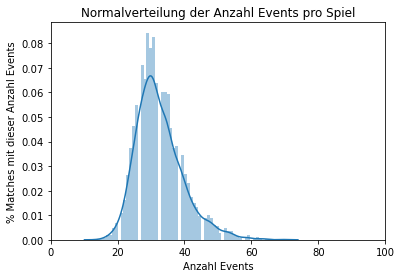

In [85]:
sns.distplot(NumEventAnalyse['EventNum'], bins=65)
plt.title('Normalverteilung der Anzahl Events pro Spiel')
plt.xlim(0,100)
plt.xlabel('Anzahl Events')
plt.ylabel('% Matches mit dieser Anzahl Events')
plt.show()


In [86]:
print('Maximum Events in einem Spiel :', NumEventAnalyse['EventNum'].max())
print('Minimum Events in einem Spiel :', NumEventAnalyse['EventNum'].min())

Maximum Events in einem Spiel : 70
Minimum Events in einem Spiel : 14
